This script generates hillslope mesh (see mesh_generation.ipynb) with varying top organic layer, where bottom boundary of the organic layer is defined by 'org_layer_bottom_bndry'. 

In [1]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_DEV'],'tools','meshing_ats'))
import meshing_ats

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# of x and z elemets:  101 ,  101
# of cells:  100


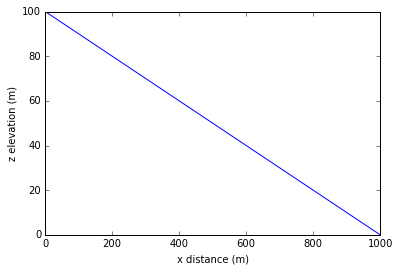

In [2]:
# 1 km long hillslope, 10% slope
x = np.linspace(0,1000,101)
z = np.linspace(100,0,101)
#print x, z
print '# of x and z elemets: ',len(x),', ',len(z)
plt.plot(x,z); plt.xlabel('x distance (m)'); plt.ylabel('z elevation (m)')
m2 = meshing_ats.Mesh2D.from_Transect(x,z)
print '# of cells: ', m2.num_cells()

In [3]:
#Changing organic layer thickness 
def org_layer_bottom_bndry(s):
    if s<100:
        thickness=0.5
    elif ((100<=s)&(s<=200)):
        thickness=-0.0045*s+0.95
    elif ((200<s)&(s<800)):
        thickness=0.05
    elif ((800<=s)&(s<=900)):
        thickness=0.0025*s-1.95
    else:
        thickness=0.3
    return thickness

# of nodes: 202 (202,)


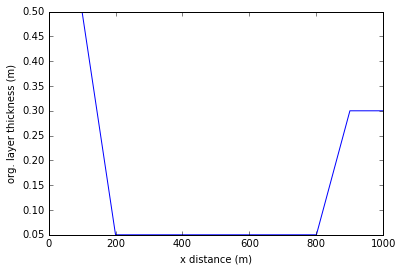

In [4]:
dzs_org_layer = np.array([org_layer_bottom_bndry(zz) for zz in m2.coords[:,0]])
print '# of nodes:', len(dzs_org_layer), np.shape(dzs_org_layer)
plt.plot(x, dzs_org_layer[0:101]); plt.xlabel('x distance (m)'); plt.ylabel('org. layer thickness (m)');
#print dzs_org_layer[0:101]
#print len(dzs_org_layer[0:101])

In [5]:
# preparing layer extrusion data for meshing_ats
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []
layer_depth = []

dz = .01
l_dz=0
for i in range(30):
    if i<=20:            #organic
        dz *= 1.2
    elif (20<i)&(i<=26): #mineral
        dz *= 1.4
    else:                #bedrock
        dz *= 1.5          
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    l_dz=dz+l_dz
    layer_depth.append(l_dz)

num_of_layers=len(layer_data)    
layer_types.append('constant')
layer_data.append(45 - sum(layer_data))
layer_ncells.append(1)
layer_depth.append(45)

print 'make sure that the length of all layer data are the same'
print len(layer_data),len(layer_ncells), len(layer_depth)

make sure that the length of all layer data are the same
31 31 31


In [6]:
# allocate 2D matrix with cols=#cells, rows=21
# here is 21 is the bottom depth of the mineral layer
mat_ids=np.zeros((m2.num_cells(), 21))
for i in range(m2.num_cells()):
    for j in range(21): # after layer 20 everything is bedrock
        if (layer_depth[j]<dzs_org_layer[i]):
            mat_ids[i,j]=1001
        else:
            mat_ids[i,j]=1002
            
# filling out layer_mat_ids
layer_mat_ids = []
for j in range(21):
    layer_mat_ids.append(mat_ids[:,j])
for j in range(21,31):
    layer_mat_ids.append(101*np.ones((100,)))

print '# of rows, # of cells:', np.shape(layer_mat_ids)

# of rows, # of cells: (31, 100)


In [7]:
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types,layer_data, layer_ncells, layer_mat_ids)
m3.write_exodus("test_organic.exo")


You are using exodus.py v 1.04 (beta-cmake), a python wrapper of some of the exodus II library.
Copyright (c) 2013, 2014, 2015, 2016 Sandia Corporation. Under the terms of Contract DE-AC04-94AL85000
with Sandia Corporation, the U.S. Government retains certain rights in this software.

Opening exodus file: test_organic.exo
Closing exodus file: test_organic.exo
